# 3. Descrição das atividades 
Implementar três classificadores de dígitos contidos no dataset MNIST, utilizando os três 
modelos lineares de Aprendizagem de Máquina (AM) estudados: Perceptron, Regressão 
Linear e Regressão Logística. Detalhes da implementação estão descritas a seguir.

## 3.1. Redução da dimensão das amostras 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import sklearn

In [2]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

### Intensidade

In [3]:
def intensidade(data):
    intensidade = []
    for i in range(len(data)):
        intensidade.append(sum(data.loc[i])/255)#somatorio da linha divido por 255
    return intensidade
        

### Simetria

In [6]:
def simetria(data):
    list_simetria = []
    for k in range(len(data)):#pular linha
        soma_line_horizontal = 0
        soma_line_vertical = 0
        tamanho = len(data.loc[k])
        
        for i in range(28):#vertical
            for j in range(14):#entre pixels das metades  
                img_inicial = data.loc[k][28*i+j]
                img_final = data.loc[k][28*i+(27-j)]
                soma_line_vertical += abs(img_inicial - img_final)
        
        for i in range(tamanho-1,int(tamanho/2),-1):#horizontal do fim até a metade iterando com -1
            img_inicial = data.loc[k][i]
            img_final = data.loc[k][abs(i-tamanho)]
            soma_line_horizontal += abs(img_inicial - img_final)
            
        soma = (soma_line_vertical+soma_line_horizontal)/2
        list_simetria.append(soma/255)
    
    return list_simetria

### Train_redu.csv Teste_redu.csv

In [7]:
def reduced(filepath):#reduzir um arquivo usando simetria e intensidade
    data =  read_instance(filepath)
    label = data['label']
    data = data.drop(columns=['Unnamed: 0'])
    data = data.drop(columns=['label'])
    intensidade_data = intensidade(data)
    simetria_data = simetria(data)
    redu_data = pd.DataFrame({'Label':label,'intensidade': intensidade_data,'simetria': simetria_data})
    return redu_data

In [8]:
#recebe arquivo csv reduz e tranforma em csv novamente 
'''train = reduced("train.csv")
train.to_csv("train_redu.csv")
test = reduced("test.csv")
test.to_csv("test_redu.csv")'''


'train = reduced("train.csv")\ntrain.to_csv("train_redu.csv")\ntest = reduced("test.csv")\ntest.to_csv("test_redu.csv")'

In [9]:
train_redu = read_instance("train_redu.csv")
train_redu = train_redu.drop(columns=["Unnamed: 0"])
train_redu = train_redu.drop(columns=["Unnamed: 0.1"])

In [10]:
test_redu = read_instance("test_redu.csv")
test_redu = test_redu.drop(columns=["Unnamed: 0"])
test_redu = test_redu.drop(columns=["Unnamed: 0.1"])

>Realizar um filtro nos dados dos arquivos train_redu.csv e test_redu.csv, deixando apenas as imagens com valores 1 ou 5 na coluna label, construindo as instâncias  train1x5 e test1x5;

## Classificação dos dígitos 1 x 5 

### Realizar um filtro 1x5

In [11]:
values = [1,5]

In [12]:
train1x5 = train_redu[train_redu.Label.isin(values)]
test1x5 = test_redu[test_redu.Label.isin(values)]

In [13]:
x_train, y_train = train1x5.drop(columns=['Label']) , train1x5['Label']
y_train = y_train.values.reshape(-1,1)
x_train = np.column_stack((x_train,np.ones((x_train.shape[0],1))))

In [14]:
x_test, y_test = test1x5.drop(columns=['Label']), test1x5['Label']
y_test = y_test.values.reshape(-1,1)
x_test = np.column_stack((x_test,np.ones((x_test.shape[0],1))))

### Plotar os dados de train1x5

In [15]:
def plot1x5(x,y):
    
    plt.scatter(x.values[:,1], x.values[:,2], color='red',marker='o',label = 5)
    plt.scatter(y.values[:,1], y.values[:,2], color='blue',marker='x',label = 1)
    plt.xlabel('intensidade')
    plt.ylabel('simetria')
    plt.legend(loc='upper left')
    plt.show()

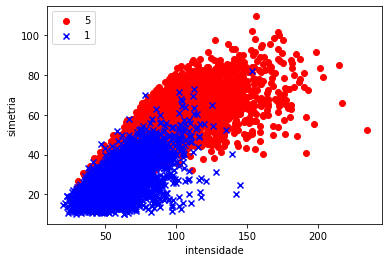

In [16]:
cinco = [5]
um = [1]
trainx5 = train_redu[train_redu.Label.isin(cinco)]
#testx5 = test_redu[test_redu.Label.isin(cinco)]
trainx1 = train_redu[train_redu.Label.isin(um)]
#testx1 = test_redu[test_redu.Label.isin(um)]
plot1x5(trainx5,trainx1)

In [18]:
pla = Perceptron(tol=0.1,max_iter=100)

Atribuir o valor alvo 
𝑦 = +1 para a imagem com valor 𝑙𝑎𝑏𝑒𝑙 = 1 e 𝑦 = −1 para 𝑙𝑎𝑏𝑒𝑙 = 5; 

In [19]:
y_train = np.where(train1x5['Label']== 1,1,-1)
y_test = np.where(test1x5['Label']== 1,1,-1)
pla.fit(x_train, y_train.ravel())# x= caracteristicas(simetria,intensidade) y = label

Perceptron(max_iter=100, tol=0.1)

Criar um método de predição do dígito que retorne o valor 1 quando o 
classificador linear classificar a saída como 𝑦 = +1 e retorne o valor 5 quando 𝑦 =
−1;

In [20]:
def pre1x5(x):
    if (pla.predict([x]) == -1):
        return int(5)
    elif(pla.predict([x]) == 1):
        return int(1)

In [21]:
pre1x5(x_train[1]) == y_train[1]

True

## Perceptron

In [22]:
pla = Perceptron(tol=0.1,max_iter=100)
pla.fit(x_train, y_train)#x_train e y_test aqui ainda é 1x5
pla.score(x_test, y_test)

0.8562412342215989

### Matriz de confusão e relatório de eficácia Perceptron

In [23]:
y_predtest_pla = pla.predict(x_test)
mc = confusion_matrix(y_test, y_predtest_pla)
display(mc)

array([[1305,   19],
       [ 391, 1137]], dtype=int64)

In [24]:
acuracia_pla= sklearn.metrics.accuracy_score(y_test, y_predtest_pla)
precisao_pla=sklearn.metrics.precision_score(y_test, y_predtest_pla)
recall_pla=sklearn.metrics.recall_score(y_test, y_predtest_pla)
f1_pla=sklearn.metrics.f1_score(y_test, y_predtest_pla)

In [25]:
def imprime(a,p,r,f):
    print("Acurácia = ",a,'\nPrecisão = ',p,'\nRecall = ',r,'\nF1 Score = ',f)

In [26]:
imprime(acuracia_pla,precisao_pla,recall_pla,f1_pla)

Acurácia =  0.8562412342215989 
Precisão =  0.9835640138408305 
Recall =  0.7441099476439791 
F1 Score =  0.8472429210134129


## Linear regression 


In [28]:
lr = LinearRegression()
linear = lr.fit(x_train, y_train)
display(linear.score(x_test, y_test))


0.6551016228573754

### Matriz de confusão e relatório de eficácia Regressão linear

In [29]:
y_predtest_linear = np.sign(linear.predict(x_test))
confusion_matrix(y_test,y_predtest_linear)

array([[1155,  169],
       [  92, 1436]], dtype=int64)

In [30]:
acuracia_linear= sklearn.metrics.accuracy_score(y_test, y_predtest_linear)
precisao_linear=sklearn.metrics.precision_score(y_test, y_predtest_linear)
recall_linear=sklearn.metrics.recall_score(y_test, y_predtest_linear)
f1_linear=sklearn.metrics.f1_score(y_test, y_predtest_linear)

In [31]:
imprime(acuracia_linear,precisao_linear,recall_linear,f1_linear)

Acurácia =  0.9084852734922861 
Precisão =  0.8947040498442368 
Recall =  0.9397905759162304 
F1 Score =  0.916693265240983


## Logistic Regression

In [32]:
lg = LogisticRegression()
logistic = lg.fit(x_train,y_train)
logistic.score(x_test, y_test)

0.9116409537166901

### Matriz de confusão e relatório de eficácia Regressão logistica

In [33]:
y_predtest_logistic = logistic.predict(x_test)
confusion_matrix(y_test,y_predtest_logistic)

array([[1190,  134],
       [ 118, 1410]], dtype=int64)

In [34]:
acuracia_logistic= sklearn.metrics.accuracy_score(y_test,y_predtest_logistic)
precisao_logistic=sklearn.metrics.precision_score(y_test,y_predtest_logistic)
recall_logistic=sklearn.metrics.recall_score(y_test,y_predtest_logistic)
f1_logistic=sklearn.metrics.f1_score(y_test,y_predtest_logistic)

In [35]:
imprime(acuracia_logistic,precisao_logistic,recall_logistic,f1_logistic)

Acurácia =  0.9116409537166901 
Precisão =  0.9132124352331606 
Recall =  0.9227748691099477 
F1 Score =  0.91796875


## 3.3. Classificador de dígitos completo 


In [36]:
x_train, y_train = train_redu.drop(columns=['Label']), train_redu['Label']
x_test, y_test = test_redu.drop(columns=['Label']), test_redu['Label']

### Logistic Regression 'One-vs-Rest'

In [37]:
ovr_logistic = LogisticRegression(multi_class='ovr')
ovr_logistic.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [34]:
y_pred_logistic = ovr_logistic.predict(x_test)
score_ovr_logistic = ovr_logistic.score(x_test,y_test)

In [35]:
acuracia_ovr_logistic= sklearn.metrics.accuracy_score(y_test,y_pred_logistic)
#precisao_ovr_logistic=sklearn.metrics.precision_score(y_test,y_pred_logistic)
#recall_ovr_logistic=sklearn.metrics.recall_score(y_test,y_pred_logistic)
#f1_ovr_logistic=sklearn.metrics.f1_score(y_test,y_pred_logistic)

In [36]:
confusion_matrix(y_test,y_pred_logistic)

array([[ 685,   58,  257,   38,    0,    0,    0,  155,  114,   79],
       [   5, 1392,    1,    2,    0,    0,    0,   48,   12,   68],
       [ 331,   53,  347,   52,    0,    0,    0,  425,   63,  105],
       [ 341,   59,  301,   99,    0,    0,    0,  445,   86,  194],
       [ 136,  175,  132,   64,    0,    0,    0,  514,   84,  287],
       [ 207,  104,  169,   53,    0,    0,    0,  554,   70,  167],
       [ 282,   81,  242,   80,    0,    0,    0,  414,   83,  238],
       [  53,  100,  169,   48,    0,    0,    0, 1029,   16,  105],
       [ 416,  113,  240,   59,    0,    0,    0,  236,  132,  177],
       [ 161,  159,  129,   61,    0,    0,    0,  423,  112,  338]],
      dtype=int64)

In [37]:
acuracia_ovr_logistic

0.28270190482884655

In [38]:
#como diferenciar falso positivos de negativo em uma matriz 10x10?

### Linear Regression 'One-vs-Rest'

In [38]:
linear_model = LinearRegression()
ovr_linear = OneVsRestClassifier(linear_model)
ovr_linear.fit(x_train,y_train)

OneVsRestClassifier(estimator=LinearRegression())

In [39]:
y_pred_linear = ovr_linear.predict(x_test)
confusion_matrix(y_test,y_pred_linear)

array([[ 794,  241,  181,    0,    0,    0,    0,  170,    0,    0],
       [   8, 1508,    2,    0,    0,    0,    0,   10,    0,    0],
       [ 452,  272,  246,    0,    0,    0,    0,  406,    0,    0],
       [ 493,  393,  206,    0,    0,    0,    0,  433,    0,    0],
       [ 225,  673,   96,    0,    0,    0,    0,  398,    0,    0],
       [ 294,  448,  127,    0,    0,    0,    0,  455,    0,    0],
       [ 430,  441,  172,    0,    0,    0,    0,  377,    0,    0],
       [ 102,  468,  129,    0,    0,    0,    0,  821,    0,    0],
       [ 540,  429,  167,    0,    0,    0,    0,  237,    0,    0],
       [ 263,  728,   92,    0,    0,    0,    0,  300,    0,    0]],
      dtype=int64)

In [40]:
ovr_linear.score(x_test,y_test)

0.23680326140437197

### Perceptron 'One-vs-Rest'

In [42]:
pla_model = Perceptron()
ovr_pla = OneVsRestClassifier(pla_model)
ovr_pla.fit(x_train,y_train)

OneVsRestClassifier(estimator=Perceptron())

In [43]:
y_pred_pla = ovr_pla.predict(x_test)
confusion_matrix(y_test,y_pred_pla)

array([[   0,   84,    0,    0,    0,  225,    0,    0, 1077,    0],
       [   0, 1478,    0,    0,    0,   15,    0,    0,   35,    0],
       [   0,  162,    0,    0,    0,  478,    0,    0,  736,    0],
       [   0,  248,    0,    0,    0,  439,    0,    0,  838,    0],
       [   0,  482,    0,    0,    0,  421,    0,    0,  489,    0],
       [   0,  301,    0,    0,    0,  505,    0,    0,  518,    0],
       [   0,  292,    0,    0,    0,  406,    0,    0,  722,    0],
       [   0,  378,    0,    0,    0,  887,    0,    0,  255,    0],
       [   0,  209,    0,    0,    0,  264,    0,    0,  900,    0],
       [   0,  501,    0,    0,    0,  315,    0,    0,  567,    0]],
      dtype=int64)

In [44]:
ovr_pla.score(x_test,y_test)

0.20264286216349195